In [1]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_full.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, :4]
y = iris[:, 4]

maxi = np.max(X)
mini = np.min(X)
avg = np.mean(X)
X = (X-avg) / (maxi-mini)

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

# shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)

X = X[inds]
y = y[inds]

print(X.shape)
print(y.shape)

(100, 5)
(100,)


In [2]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(h, y):
    return (-y*np.log(h) - (1-y)*np.log(1-h)).mean()

def predict(X, theta):    
    y_hat = sigmoid_function(np.dot(X, theta))
    return y_hat

def compute_gradient(X, y_hat, y):
    return np.dot(X.T, (y_hat - y)) / y.size

In [11]:
# training
lr=0.01
num_iter=50000

theta = np.random.randn(5)/100.0
losses = []
accs   = []

for i in range(num_iter):
    # predict z
    y_hat = predict(X, theta)
    
    # compute loss
    loss = loss_function(y_hat, y)

    # compute mean of gradient
    gradient = compute_gradient(X, y_hat, y)
    
    theta -= lr*gradient    
    #print('new theta: ', theta)

    # for debug
    if(i%10 == 0):
        # loss
        losses.append(loss)
        
        # accuracy for training
        preds = predict(X, theta).round()
        acc = (preds == y).mean()
        accs.append(acc) 

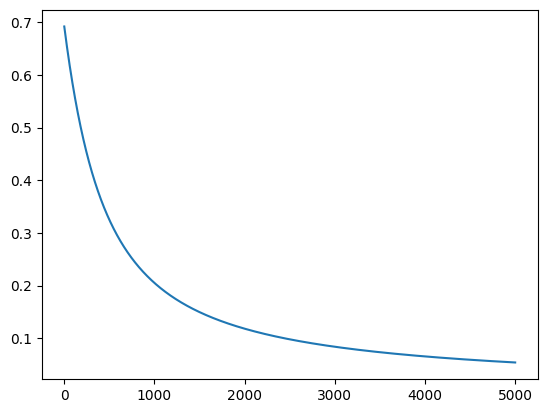

In [12]:
# show figures
plt.plot(losses)
plt.show()

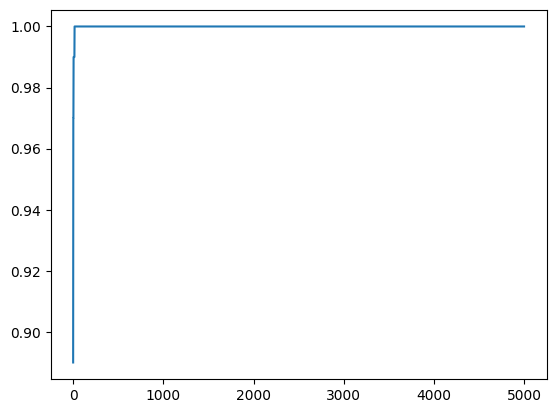

In [13]:
plt.plot(accs)
plt.show()

In [14]:
preds = predict(X, theta).round()
print(preds)
print(y)

[0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 0. 1. 0.]
[0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 0. 1. 0.]
